In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "Metro_median_sale_price_uc_sfr_sm_month.csv"

# Read the CSV file with 'utf-8' encoding and handle errors with 'latin-1'
Sale_price_zillow_df = pd.read_csv(file_path)

In [3]:
Sale_price_zillow_df

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,...,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023
0,102001,0,United States,country,NaN,228450.0,232617.0,237617.0,243167.0,245667.0,...,350000.0,344333.0,337667.0,331000.0,325667.0,326333.0,333000.0,342333.0,353333.0,362667
1,394913,1,"New York, NY",msa,NY,396333.0,400000.0,408333.0,420667.0,430667.0,...,591667.0,576000.0,559333.0,550650.0,546317.0,542983.0,543000.0,553000.0,572667.0,593000
2,753899,2,"Los Angeles, CA",msa,CA,652500.0,666667.0,678333.0,685000.0,690333.0,...,888000.0,876667.0,865833.0,854167.0,844167.0,841333.0,849667.0,861333.0,878000.0,894667
3,394463,3,"Chicago, IL",msa,IL,230667.0,239333.0,247333.0,256667.0,256333.0,...,300000.0,290833.0,284167.0,279167.0,276000.0,275817.0,283483.0,294150.0,307333.0,319000
4,394514,4,"Dallas, TX",msa,TX,248750.0,256667.0,263333.0,268333.0,270833.0,...,401500.0,393583.0,385917.0,376750.0,367333.0,366667.0,370000.0,380000.0,388333.0,400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,394869,869,"Moberly, MO",msa,MO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,114117.0,123183.0,133267.0,143233.0,158750
594,395004,872,"Prineville, OR",msa,OR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,442833.0,429983.0,435817.0,426817
595,394418,880,"Brookings, OR",msa,OR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,418333.0,442000
596,394564,884,"Elk City, OK",msa,OK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152950


In [4]:
# Check for NaN values
nan_check = Sale_price_zillow_df.isna()
nan_check

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,...,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,False
594,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
595,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
596,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False


In [5]:
# Remove rows with NaN values
Sale_price_zillow_df_filled = Sale_price_zillow_df.fillna(0)
Sale_price_zillow_df_filled 

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,...,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023
0,102001,0,United States,country,0,228450.0,232617.0,237617.0,243167.0,245667.0,...,350000.0,344333.0,337667.0,331000.0,325667.0,326333.0,333000.0,342333.0,353333.0,362667
1,394913,1,"New York, NY",msa,NY,396333.0,400000.0,408333.0,420667.0,430667.0,...,591667.0,576000.0,559333.0,550650.0,546317.0,542983.0,543000.0,553000.0,572667.0,593000
2,753899,2,"Los Angeles, CA",msa,CA,652500.0,666667.0,678333.0,685000.0,690333.0,...,888000.0,876667.0,865833.0,854167.0,844167.0,841333.0,849667.0,861333.0,878000.0,894667
3,394463,3,"Chicago, IL",msa,IL,230667.0,239333.0,247333.0,256667.0,256333.0,...,300000.0,290833.0,284167.0,279167.0,276000.0,275817.0,283483.0,294150.0,307333.0,319000
4,394514,4,"Dallas, TX",msa,TX,248750.0,256667.0,263333.0,268333.0,270833.0,...,401500.0,393583.0,385917.0,376750.0,367333.0,366667.0,370000.0,380000.0,388333.0,400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,394869,869,"Moberly, MO",msa,MO,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,114117.0,123183.0,133267.0,143233.0,158750
594,395004,872,"Prineville, OR",msa,OR,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,442833.0,429983.0,435817.0,426817
595,394418,880,"Brookings, OR",msa,OR,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,418333.0,442000
596,394564,884,"Elk City, OK",msa,OK,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152950


In [13]:
Sale_price_zillow_df_filled.to_csv('Median_Sale_price.csv', index=False)

In [6]:
file_path = "Metro_mlp_uc_sfr_sm_month.csv"

# Read the CSV file with 'utf-8' encoding and handle errors with 'latin-1'
list_price_zillow_df = pd.read_csv(file_path)

In [7]:
list_price_zillow_df

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,102001,0,United States,country,NaN,262433.0,270467.0,277133.0,280500.0,280800.0,...,385967.0,381000.0,374967.0,370633.0,370633.0,374000.0,381667.0,389667,396167,399167
1,394913,1,"New York, NY",msa,NY,492633.0,499333.0,507966.0,516633.0,522967.0,...,603300.0,608300.0,614633.0,617633.0,624333.0,634633.0,644967.0,658300,666667,676600
2,753899,2,"Los Angeles, CA",msa,CA,778333.0,791667.0,799667.0,806300.0,805967.0,...,925633.0,915667.0,905859.0,899859.0,913159.0,929966.0,961633.0,981333,1014667,1058000
3,394463,3,"Chicago, IL",msa,IL,295800.0,309133.0,317600.0,321567.0,319933.0,...,316300.0,309667.0,303233.0,299867.0,303200.0,309967.0,320000.0,329967,337967,344300
4,394514,4,"Dallas, TX",msa,TX,325253.0,330319.0,333613.0,333632.0,330298.0,...,424667.0,417998.0,409632.0,402965.0,399597.0,404630.0,416630.0,432667,444300,448967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,149250.0,153150.0,154983.0,153567.0,148000.0,146833.0,147467.0,149633,147383,147250
922,394743,936,"Ketchikan, AK",msa,AK,324500.0,327833.0,333000.0,344500.0,358167.0,...,456167.0,447500.0,452833.0,452000.0,440667.0,438500.0,448333.0,462667,459167,444000
923,753874,937,"Craig, CO",msa,CO,193817.0,196400.0,197050.0,197800.0,195933.0,...,368250.0,375733.0,373233.0,374933.0,371617.0,355817.0,337483.0,337167,356333,359633
924,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,137083.0,123750.0,109772.0,100522.0,95908.0,94241.0,100075.0,102772,104417,99417


In [8]:
# Remove rows with NaN values
list_price_zillow_df_filled = list_price_zillow_df.fillna(0)
list_price_zillow_df_filled 

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,102001,0,United States,country,0,262433.0,270467.0,277133.0,280500.0,280800.0,...,385967.0,381000.0,374967.0,370633.0,370633.0,374000.0,381667.0,389667,396167,399167
1,394913,1,"New York, NY",msa,NY,492633.0,499333.0,507966.0,516633.0,522967.0,...,603300.0,608300.0,614633.0,617633.0,624333.0,634633.0,644967.0,658300,666667,676600
2,753899,2,"Los Angeles, CA",msa,CA,778333.0,791667.0,799667.0,806300.0,805967.0,...,925633.0,915667.0,905859.0,899859.0,913159.0,929966.0,961633.0,981333,1014667,1058000
3,394463,3,"Chicago, IL",msa,IL,295800.0,309133.0,317600.0,321567.0,319933.0,...,316300.0,309667.0,303233.0,299867.0,303200.0,309967.0,320000.0,329967,337967,344300
4,394514,4,"Dallas, TX",msa,TX,325253.0,330319.0,333613.0,333632.0,330298.0,...,424667.0,417998.0,409632.0,402965.0,399597.0,404630.0,416630.0,432667,444300,448967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,753929,935,"Zapata, TX",msa,TX,0.0,0.0,0.0,0.0,0.0,...,149250.0,153150.0,154983.0,153567.0,148000.0,146833.0,147467.0,149633,147383,147250
922,394743,936,"Ketchikan, AK",msa,AK,324500.0,327833.0,333000.0,344500.0,358167.0,...,456167.0,447500.0,452833.0,452000.0,440667.0,438500.0,448333.0,462667,459167,444000
923,753874,937,"Craig, CO",msa,CO,193817.0,196400.0,197050.0,197800.0,195933.0,...,368250.0,375733.0,373233.0,374933.0,371617.0,355817.0,337483.0,337167,356333,359633
924,395188,938,"Vernon, TX",msa,TX,0.0,0.0,0.0,0.0,0.0,...,137083.0,123750.0,109772.0,100522.0,95908.0,94241.0,100075.0,102772,104417,99417


In [14]:
list_price_zillow_df_filled.to_csv('Median_list_price.csv', index=False)

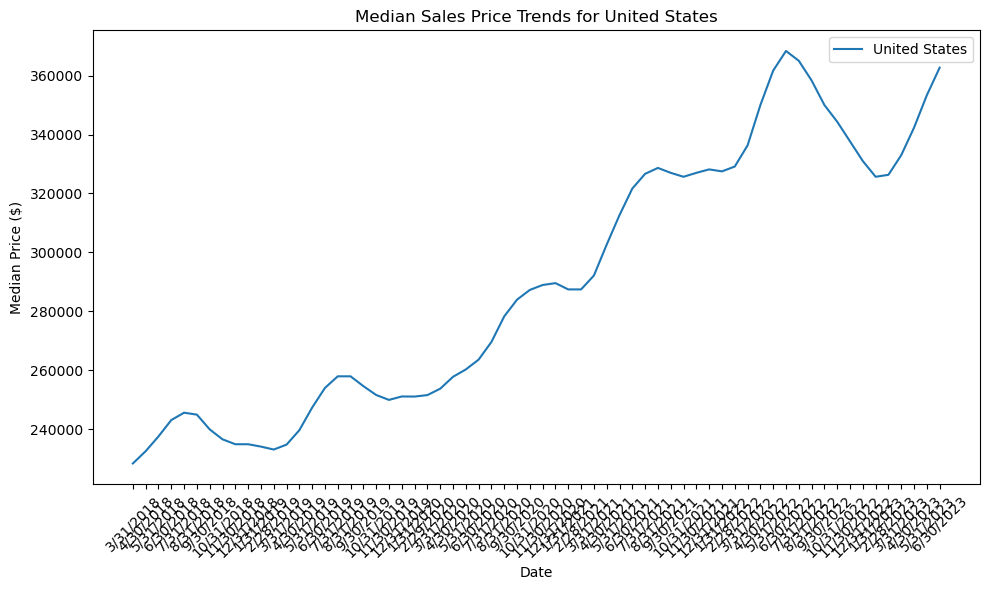

In [9]:
# Select a subset of states for visualization
selected_states = ['United States']  # Add more if needed
selected_df = Sale_price_zillow_df_filled [Sale_price_zillow_df_filled ['RegionName'].isin(selected_states)]

# Extract the date columns
date_columns = Sale_price_zillow_df_filled.columns[5:]


# Plotting median sales price trends for selected states
plt.figure(figsize=(10, 6))
for index, row in selected_df.iterrows():
    plt.plot(date_columns, row[date_columns], label=row['RegionName'])

plt.title("Median Sales Price Trends for United States")
plt.xlabel("Date")
plt.ylabel("Median Price ($)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
date_columns = Sale_price_zillow_df_filled.columns[5:]
date_columns

Index(['3/31/2018', '4/30/2018', '5/31/2018', '6/30/2018', '7/31/2018',
       '8/31/2018', '9/30/2018', '10/31/2018', '11/30/2018', '12/31/2018',
       '1/31/2019', '2/28/2019', '3/31/2019', '4/30/2019', '5/31/2019',
       '6/30/2019', '7/31/2019', '8/31/2019', '9/30/2019', '10/31/2019',
       '11/30/2019', '12/31/2019', '1/31/2020', '2/29/2020', '3/31/2020',
       '4/30/2020', '5/31/2020', '6/30/2020', '7/31/2020', '8/31/2020',
       '9/30/2020', '10/31/2020', '11/30/2020', '12/31/2020', '1/31/2021',
       '2/28/2021', '3/31/2021', '4/30/2021', '5/31/2021', '6/30/2021',
       '7/31/2021', '8/31/2021', '9/30/2021', '10/31/2021', '11/30/2021',
       '12/31/2021', '1/31/2022', '2/28/2022', '3/31/2022', '4/30/2022',
       '5/31/2022', '6/30/2022', '7/31/2022', '8/31/2022', '9/30/2022',
       '10/31/2022', '11/30/2022', '12/31/2022', '1/31/2023', '2/28/2023',
       '3/31/2023', '4/30/2023', '5/31/2023', '6/30/2023'],
      dtype='object')

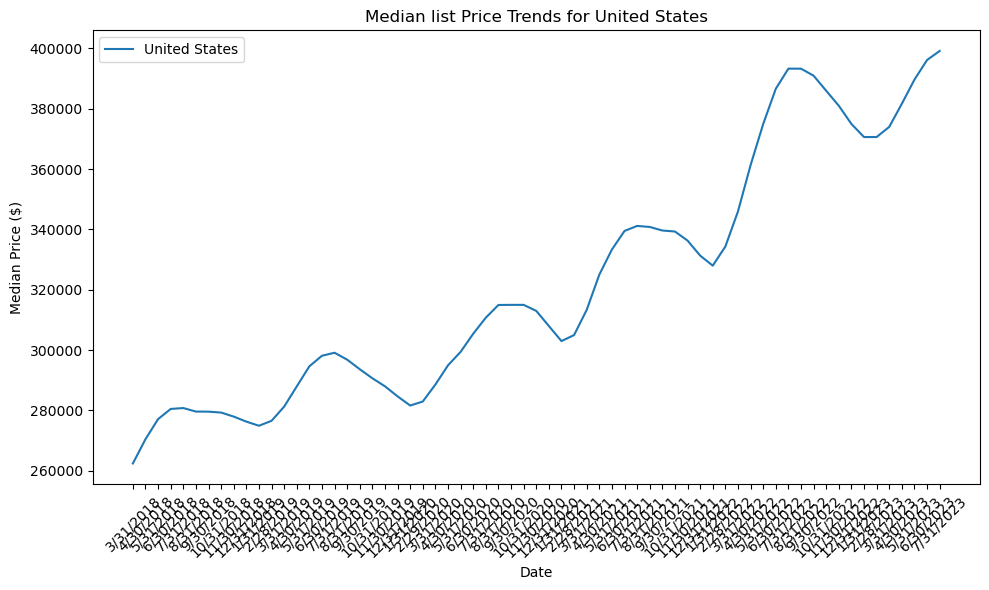

In [11]:
# Select a subset of states for visualization
selected_states = ['United States']  # Add more if needed
selected_df = list_price_zillow_df_filled [list_price_zillow_df_filled ['RegionName'].isin(selected_states)]

# Extract the date columns
date_columns = list_price_zillow_df_filled.columns[5:]


# Plotting median sales price trends for selected states
plt.figure(figsize=(10, 6))
for index, row in selected_df.iterrows():
    plt.plot(date_columns, row[date_columns], label=row['RegionName'])

plt.title("Median list Price Trends for United States")
plt.xlabel("Date")
plt.ylabel("Median Price ($)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:

# Assuming you have two DataFrames named sale_price_df and list_price_df

# Merge the DataFrames based on 'RegionID'
merged_df = pd.merge(Sale_price_zillow_df_filled, list_price_zillow_df_filled, on='RegionID', suffixes=('_sale', '_list'))

# List of columns to calculate the price gap
common_columns = ['3/31/2018', '4/30/2018', '5/31/2018', '6/30/2018', '7/31/2018',
       '8/31/2018', '9/30/2018', '10/31/2018', '11/30/2018', '12/31/2018',
       '1/31/2019', '2/28/2019', '3/31/2019', '4/30/2019', '5/31/2019',
       '6/30/2019', '7/31/2019', '8/31/2019', '9/30/2019', '10/31/2019',
       '11/30/2019', '12/31/2019', '1/31/2020', '2/29/2020', '3/31/2020',
       '4/30/2020', '5/31/2020', '6/30/2020', '7/31/2020', '8/31/2020',
       '9/30/2020', '10/31/2020', '11/30/2020', '12/31/2020', '1/31/2021',
       '2/28/2021', '3/31/2021', '4/30/2021', '5/31/2021', '6/30/2021',
       '7/31/2021', '8/31/2021', '9/30/2021', '10/31/2021', '11/30/2021',
       '12/31/2021', '1/31/2022', '2/28/2022', '3/31/2022', '4/30/2022',
       '5/31/2022', '6/30/2022', '7/31/2022', '8/31/2022', '9/30/2022',
       '10/31/2022', '11/30/2022', '12/31/2022', '1/31/2023', '2/28/2023',
       '3/31/2023', '4/30/2023', '5/31/2023', '6/30/2023']  # Add all column names

# Create an empty DataFrame to store the price gaps
price_gap_df = pd.DataFrame()

# Add 'RegionID' column to price_gap_df
price_gap_df['RegionID'] = merged_df['RegionID']
price_gap_df['RegionName'] = merged_df['RegionName_sale']


# Iterate through the common columns and calculate the price gap
for col in common_columns:
    price_gap_df[col] = merged_df[col + '_list'] - merged_df[col + '_sale']

# Print the DataFrame with the calculated price gaps
price_gap_df





,RegionID,RegionName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,...,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023
0,102001,United States,33983.0,37850.0,39516.0,37333.0,35133.0,34633.0,39600.0,42667.0,...,40967.0,41634.0,43333.0,43967.0,44966.0,44300.0,41000.0,39334.0,36334.0,33500
1,394913,"New York, NY",96300.0,99333.0,99633.0,95966.0,92300.0,81700.0,86033.0,95367.0,...,8296.0,27300.0,48967.0,63983.0,71316.0,81350.0,91633.0,91967.0,85633.0,73667
2,753899,"Los Angeles, CA",125833.0,125000.0,121334.0,121300.0,115634.0,110967.0,109000.0,108000.0,...,47967.0,48966.0,49834.0,51692.0,55692.0,71826.0,80299.0,100300.0,103333.0,120000
3,394463,"Chicago, IL",65133.0,69800.0,70267.0,64900.0,63600.0,60966.0,65167.0,66800.0,...,21267.0,25467.0,25500.0,24066.0,23867.0,27383.0,26484.0,25850.0,22634.0,18967
4,394514,"Dallas, TX",76503.0,73652.0,70280.0,65299.0,59465.0,57433.0,61633.0,65633.0,...,31833.0,31084.0,32081.0,32882.0,35632.0,32930.0,34630.0,36630.0,44334.0,44300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,394869,"Moberly, MO",103683.0,108783.0,114950.0,109117.0,104183.0,97167.0,94667.0,97900.0,...,170783.0,174033.0,169833.0,174867.0,175800.0,61683.0,44267.0,37600.0,40500.0,31333
594,395004,"Prineville, OR",328933.0,320633.0,322167.0,340650.0,351800.0,353600.0,351417.0,351833.0,...,568317.0,549167.0,543167.0,537333.0,542150.0,555483.0,123467.0,131500.0,96333.0,102816
595,394418,"Brookings, OR",395400.0,403650.0,417150.0,423667.0,428333.0,421000.0,429967.0,437633.0,...,533050.0,516600.0,517967.0,536133.0,537817.0,548983.0,537150.0,535167.0,104334.0,90983
596,394564,"Elk City, OK",126000.0,129333.0,133333.0,137817.0,141150.0,143150.0,143333.0,144650.0,...,159950.0,161617.0,164933.0,159950.0,158283.0,163300.0,168300.0,170417.0,165417.0,9133


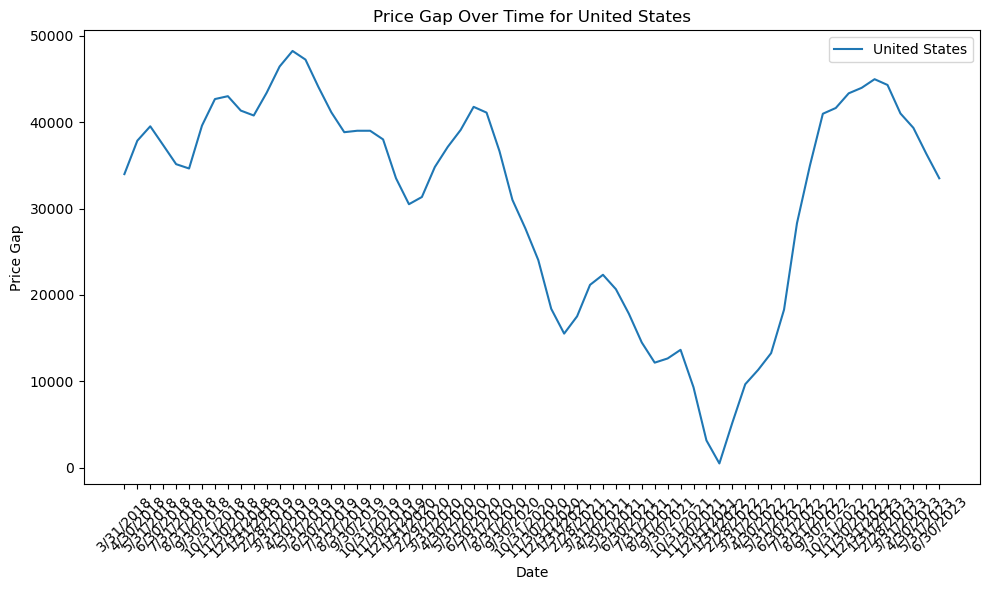

In [23]:
# Select a subset of states for visualization
selected_states = ['United States']  # Add more if needed
selected_df = price_gap_df[price_gap_df ['RegionName'].isin(selected_states)]

# Extract the date columns
date_columns = price_gap_df.columns[2:]
# Plotting median sales price trends for selected states
plt.figure(figsize=(10, 6))
for index, row in selected_df.iterrows():
    plt.plot(date_columns, row[date_columns], label=row['RegionName'])

plt.title(f'Price Gap Over Time for United States')
plt.xlabel('Date')
plt.ylabel('Price Gap')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


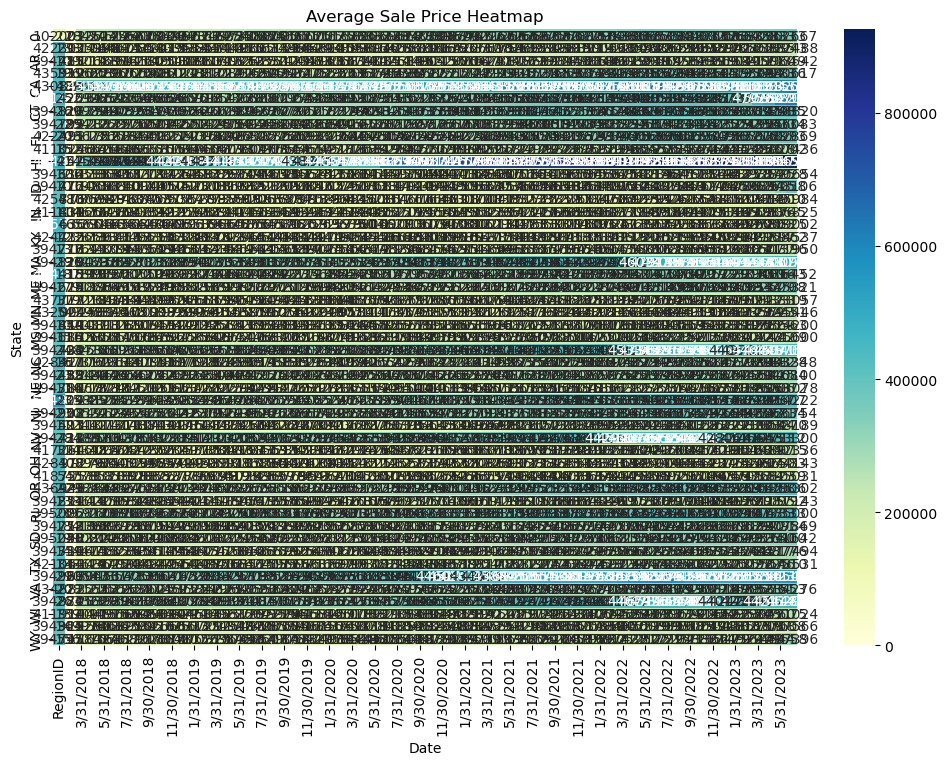

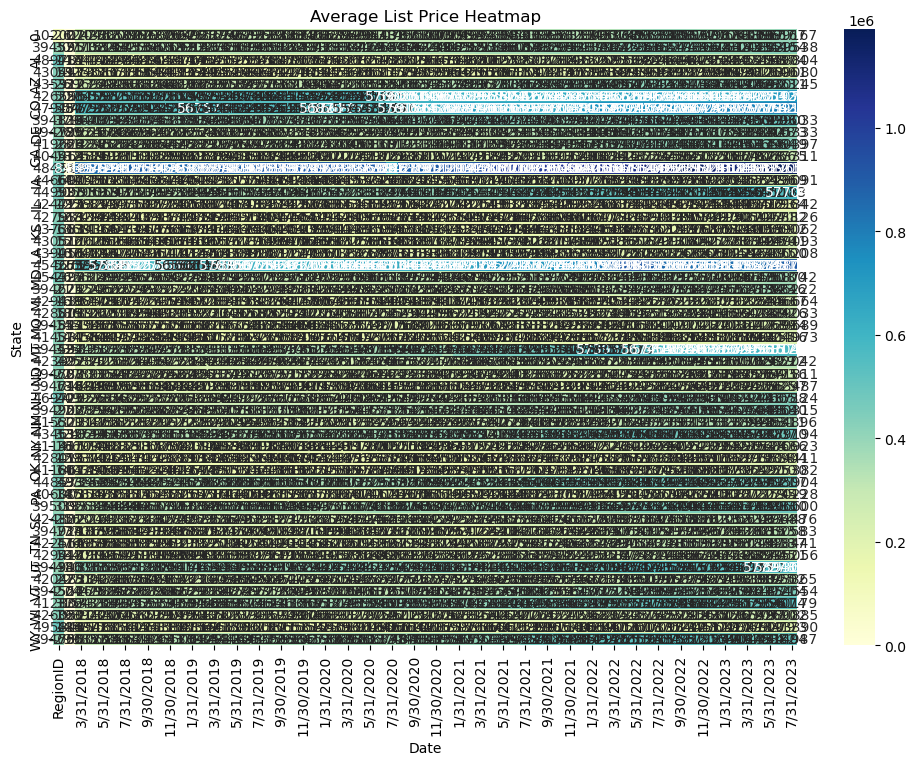

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average sale price and list price across different states
average_sale_price = Sale_price_zillow_df_filled.groupby('StateName').mean()
average_list_price = list_price_zillow_df_filled.groupby('StateName').mean()

# Create a heatmap for average sale price
plt.figure(figsize=(12, 8))
sns.heatmap(average_sale_price, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Sale Price Heatmap")
plt.xlabel("Date")
plt.ylabel("State")
plt.show()

# Create a heatmap for average list price
plt.figure(figsize=(12, 8))
sns.heatmap(average_list_price, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average List Price Heatmap")
plt.xlabel("Date")
plt.ylabel("State")
plt.show()


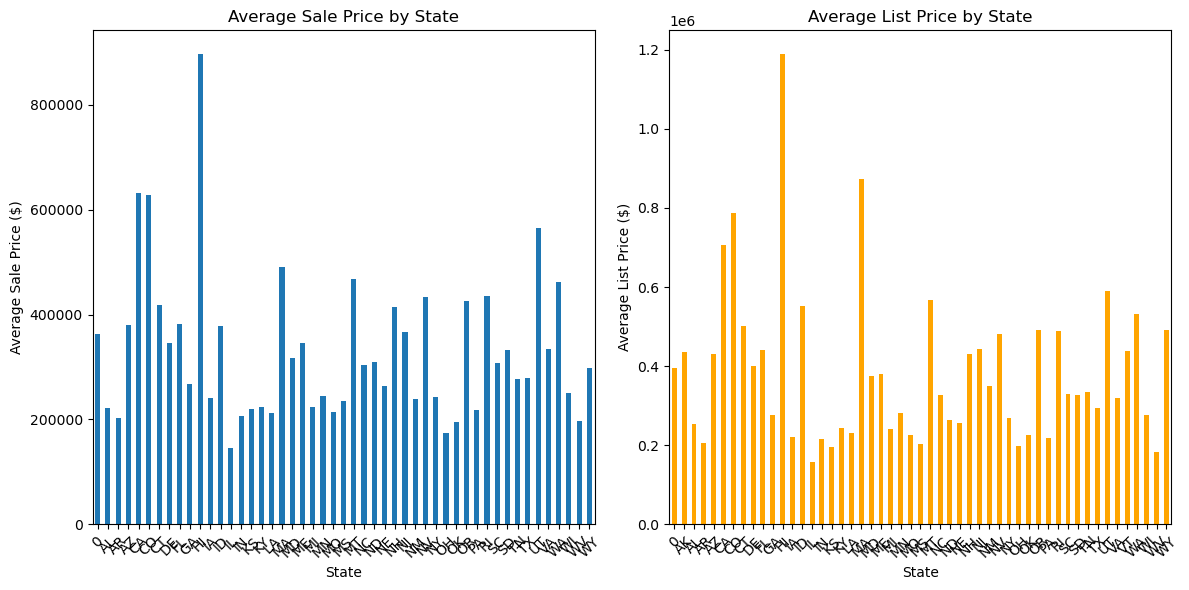

In [27]:


# Calculate the average sale price and list price across different states
average_sale_price = Sale_price_zillow_df_filled.groupby('StateName')['6/30/2023'].mean()
average_list_price = list_price_zillow_df_filled.groupby('StateName')['6/30/2023'].mean()

# Create bar charts for price variation by state
plt.figure(figsize=(12, 6))

# Bar chart for average sale price
plt.subplot(1, 2, 1)
average_sale_price.plot(kind='bar')
plt.title("Average Sale Price by State")
plt.xlabel("State")
plt.ylabel("Average Sale Price ($)")
plt.xticks(rotation=45)

# Bar chart for average list price
plt.subplot(1, 2, 2)
average_list_price.plot(kind='bar', color='orange')
plt.title("Average List Price by State")
plt.xlabel("State")
plt.ylabel("Average List Price ($)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

